In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [72]:
csv_folder = "./inference_csv"
files = {
    "Faster-RCNN-R50": "Faster_1.csv",
    "Faster-RCNN-R101": "Faster_101.csv",
    "Faster-RCNN-X101": "Faster_XXX.csv",
    "RetinaNet-R50": "Retinanet_1.csv",
    "RetinaNet-R101": "Retinanet_101.csv",
}
title = "Scores distributions"


def plot(files, title, save, th):
    fig, ax = plt.subplots()
    for file_key in files:
        file = files[file_key]
        path = os.path.join(csv_folder, file)

        all_scores = []
        with open(path, "r") as f:
            for l in f.readlines():
                all_scores += [float(v) for v in l.replace("\n", "").split(" ")]

        filt_scores = [sc for sc in all_scores if sc > th]
        sns.kdeplot(filt_scores, label=file_key, ax=ax)

    plt.legend()
    plt.title(title + f" (th={th})")
    plt.savefig(save)
    plt.show()
    

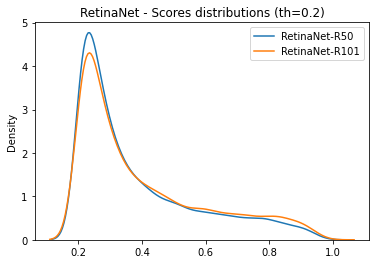

In [86]:
files = {
    "RetinaNet-R50": "Retinanet_1_3x.csv",
    "RetinaNet-R101": "Retinanet_101.csv",
}
title = "RetinaNet - Scores distributions"
save = "retinanet.pdf"

plot(files, title, save, th=0.20)

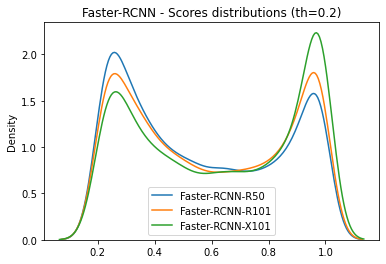

In [87]:
files = {
    "Faster-RCNN-R50": "Faster_1_3x.csv",
    "Faster-RCNN-R101": "Faster_101.csv",
    "Faster-RCNN-X101": "Faster_XXX.csv",
}
title = "Faster-RCNN - Scores distributions"
save = "faster.pdf"

plot(files, title, save, th=0.2)